##  Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data sets- train and test 
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
#Look at top values of train data 
train.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#Print the column names of train data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Check the data type of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Print the dimension of train and test data
train.shape  
test.shape

(418, 11)

In [7]:
#Print summary statistics of train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Print the number of missing values in each column of train and test data
train.isna().sum()
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

/home/akhilesh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


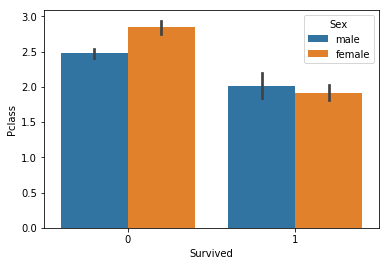

In [9]:
#Barchart of Survived, Pclass, Sex, Embarked
sns.barplot('Survived','Pclass',hue='Sex',data=train)

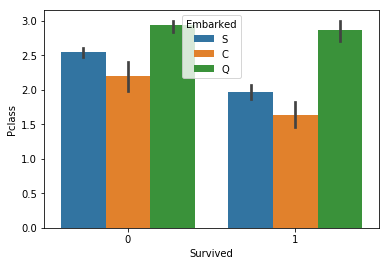

In [10]:
sns.barplot('Survived','Pclass',hue='Embarked',data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa7414c0c>,
      dtype=object)

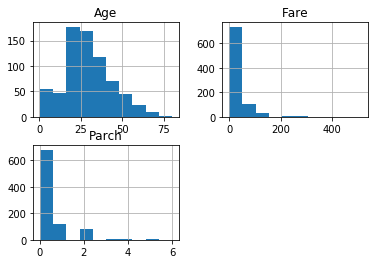

In [11]:
#Histogram of Age, Parch, Fare
train[['Age','Parch','Fare']].hist()

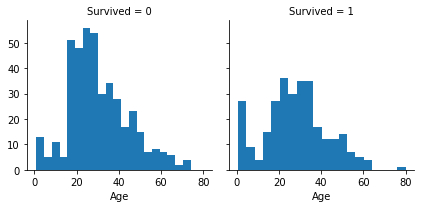

In [12]:
#Plot histogram of age for survived and did not survived class
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

<Figure size 432x288 with 0 Axes>

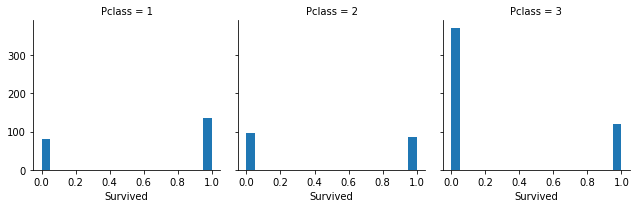

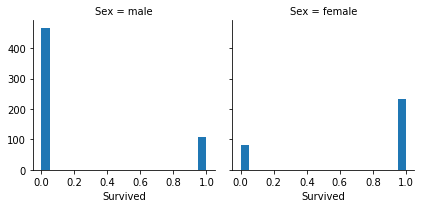

In [13]:
#Count class and geder wise survival rate - plot with appropriate chart
plt.figure(0)
g=sns.FacetGrid(train,col='Pclass')
g.map(plt.hist,'Survived',bins=20)
plt.figure(1)
g=sns.FacetGrid(train,col='Sex')
g.map(plt.hist,'Survived',bins=20)

## Handling Missing Values

In [14]:
#Replace the msiing values in Embarked column by 'S'
test['Embarked'].fillna('S',inplace=True)

In [15]:
#Impute the missing values in Fare column with median value
test['Fare'].fillna(test['Fare'].median(),inplace=True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import numpy as np
age_avg = test['Age'].mean()
age_std = test['Age'].std()
age_null_count = test['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
test.loc[np.isnan(test['Age']), 'Age'] = age_null_random_list
test['Age'] = test['Age'].astype(int)
test.Age.head(5)

0    34
1    47
2    62
3    27
4    22
Name: Age, dtype: int32

## Feature Engineering - Creating new features

In [17]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
test['FamilySize']=test.Parch+test.SibSp+1
#train['FamilySize'].astype(int)
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,1


In [18]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
test.loc[test['FamilySize']==1,'IsAlone']=True

test['IsAlone'].fillna(False,inplace=True)
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,1,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,2,False
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,1,True
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,1,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,3,False


In [19]:
#Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True
test.loc[train['Cabin'].isnull(),'Has_Cabin']=False
test['Has_Cabin'].fillna(True,inplace=True)
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_Cabin
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,1,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,2,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,1,True,False
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,1,True,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,3,False,False


In [20]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
test.drop(['PassengerId','Name','Ticket','Cabin','SibSp'],axis=1,inplace=True)


In [21]:
test.head(4)

,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Has_Cabin
0,3,male,34,0,7.8292,Q,1,True,False
1,3,female,47,0,7.0000,S,2,False,True
2,2,male,62,0,9.6875,Q,1,True,False
3,3,male,27,0,8.6625,S,1,True,True


## Check the preprocessed data

In [22]:
#Print the top five elemnets
test.isnull().sum()

Pclass        0
Sex           0
Age           0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Has_Cabin     0
dtype: int64

## Model Building

In [26]:
#Prepare X and y
x=test.iloc[:,1:]
y=test.iloc[:,:1]
x.head(5)
test.isna().sum()


Pclass        0
Sex           0
Age           0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Has_Cabin     0
dtype: int64

In [ ]:
test.isna().sum()



In [ ]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.iloc[:,0]=le.fit_transform(x.iloc[:,0])
x.iloc[:,5]=le.fit_transform(x.iloc[:,5])
x.iloc[:,7]=le.fit_transform(x.iloc[:,7])
#x.iloc[:,8]=le.fit_transform(x.iloc[:,8])


In [ ]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=99)
y_train.shape

In [ ]:
# Create the model
# Fitting the decision tree with default hyperparameters
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(x_train,y_train)

In [ ]:
#Print the tree
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file="tree5.dot",feature_names=test.columns[1:],rounded=True,filled=True)
            

<img src="tree2.png">

In [54]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


# Find a better model

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
n_folds=5
parameters={'max_depth':range(1,9)}
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy")
tree.fit(x_train, y_train)

In [134]:
# scores of GridSearch CV
scores=tree.cv_results_
scores=pd.DataFrame(scores)


/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/

In [135]:
# plotting accuracies with max_depth


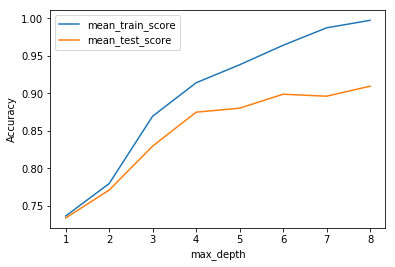

In [136]:
plt.figure()
plt.plot(scores['param_max_depth'],scores['mean_train_score'])
plt.plot(scores['param_max_depth'],scores['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')




plt.legend()
plt.show()

In [141]:
# GridSearchCV to find optimal min_sample_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
cv=n_folds,
scoring="accuracy")
tree.fit(x_train, y_train)

/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [142]:
# scores of GridSearch CV
scores=tree.cv_results_
scores=pd.DataFrame(scores)

/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/

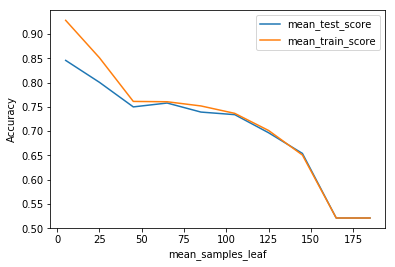

In [143]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores['param_min_samples_leaf'],scores['mean_test_score'])
plt.plot(scores['param_min_samples_leaf'],scores['mean_train_score'])
plt.xlabel('mean_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [144]:

#GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds=5
parameters={'min_samples_split':range(5,200,20)}
dtree=DecisionTreeClassifier(criterion='gini',random_state=100)
tree=GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy')
tree.fit(x_train,y_train)

/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [145]:
# scores of GridSearch CV
scores=tree.cv_results_
scores=pd.DataFrame(scores)

/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/akhilesh/anaconda3/

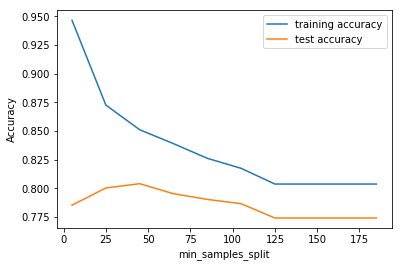

In [43]:
# plotting accuracies with min_samples_leaf


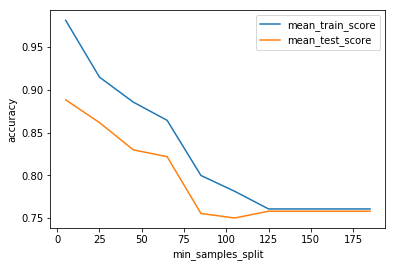

In [146]:
plt.figure()
plt.plot(scores.param_min_samples_split,scores.mean_train_score)
plt.plot(scores.param_min_samples_split,scores.mean_test_score)
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [148]:
# Create a model with optimal hyperparameters - max_depth, min_samples_leaf, min_samples_split
#Decide the optimal values by looking at the previous plottings
clf_gini = DecisionTreeClassifier(criterion = "gini",
random_state = 100,
max_depth=5,
min_samples_leaf=50,
min_samples_split=50)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [151]:
#Print the otimal Model
from sklearn.tree import export_graphviz
export_graphviz(clf_gini,out_file="tree4.odt",feature_names=test.columns[1:],rounded=True,filled=True)


<img src="tree3.png">

In [47]:
# Let's check the evaluation metrics of our optimal model


             precision    recall  f1-score   support

          0       0.77      0.91      0.83        55
          1       0.80      0.57      0.67        35

avg / total       0.78      0.78      0.77        90

[[50  5]
 [15 20]]
0.7777777777777778
